In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score,accuracy_score,precision_score,recall_score,f1_score, confusion_matrix, classification_report

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[DataSet](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

This dataset contains 5110 rows with 12 different characteristics:

- **id**: unique identifier;
- **gender**: the patient's gender ("Male", "Female" or "Other");
- **age**: patient's age;
- **hypertension**: the presence of hypertension (0 - no, 1 - yes);
- **heart_disease**: presence of heart disease (0 - no, 1 - yes);
- **ever_married**: marriage status ("No" or "Yes");
- **work_type**: type of work ("children", "Govt_jov", "Never_worked", "Private" or "Self-employed");
- **Residence_type**: type of residence ("Rural" or "Urban");
- **avg_glucose_level**: average blood glucose level;
- **bmi**: body mass index;
- **smoking_status**: smoking status ("formerly smoked", "never smoked", "smokes" or "Unknown");
- **stroke**: whether a stroke has occurred (0 - no, 1 - yes).



In [2]:
file_path = '/content/drive/My Drive/Colab Notebooks/Colab/Stroke/strokeDataSet.csv'
df = pd.read_csv(file_path)

In [3]:
df = pd.read_csv(file_path)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.shape

(5110, 12)

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df_col = df.columns

df_col

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
 df.duplicated().sum()

0

# ***Categorical***

In [10]:
categorical = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables are:', len(categorical))

df[categorical].head()

Number of categorical variables are: 5


,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [11]:
df[categorical].isnull().sum()

,0
gender,0
ever_married,0
work_type,0
Residence_type,0
smoking_status,0


In [12]:
for var in categorical:
    print("+" * 40)
    print(df[var].value_counts())

++++++++++++++++++++++++++++++++++++++++
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [13]:
for feature in categorical:
    print('Feature', feature, 'has', df[feature].nunique(), 'labels')

Feature gender has 3 labels
Feature ever_married has 2 labels
Feature work_type has 5 labels
Feature Residence_type has 2 labels
Feature smoking_status has 4 labels


In [14]:
df = df[df['gender'] != 'Other']

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# ***Numerical***



In [15]:
numerical = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables are:', len(numerical))

df[numerical].head()

Number of numerical variables are: 7


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


In [16]:
df[numerical].isnull().sum()

,0
id,0
age,0
hypertension,0
heart_disease,0
avg_glucose_level,0
bmi,201
stroke,0


In [17]:
# Заповнення пропущених значень медіанним
df.loc[:, 'bmi'] = df['bmi'].fillna(df['bmi'].median())

In [18]:
df[numerical].isnull().sum()

,0
id,0
age,0
hypertension,0
heart_disease,0
avg_glucose_level,0
bmi,0
stroke,0


***Викиди у числових змінних***


In [19]:
print(round(df[numerical].describe()),2)

            id     age  hypertension  heart_disease  avg_glucose_level  \
count   5109.0  5109.0        5109.0         5109.0             5109.0   
mean   36514.0    43.0           0.0            0.0              106.0   
std    21162.0    23.0           0.0            0.0               45.0   
min       67.0     0.0           0.0            0.0               55.0   
25%    17740.0    25.0           0.0            0.0               77.0   
50%    36922.0    45.0           0.0            0.0               92.0   
75%    54643.0    61.0           0.0            0.0              114.0   
max    72940.0    82.0           1.0            1.0              272.0   

          bmi  stroke  
count  5109.0  5109.0  
mean     29.0     0.0  
std       8.0     0.0  
min      10.0     0.0  
25%      24.0     0.0  
50%      28.0     0.0  
75%      33.0     0.0  
max      98.0     1.0   2



Я намалюю блок-діаграми, щоб візуалізувати викиди у вищезгаданих змінних.

Text(0, 0.5, 'bmi')

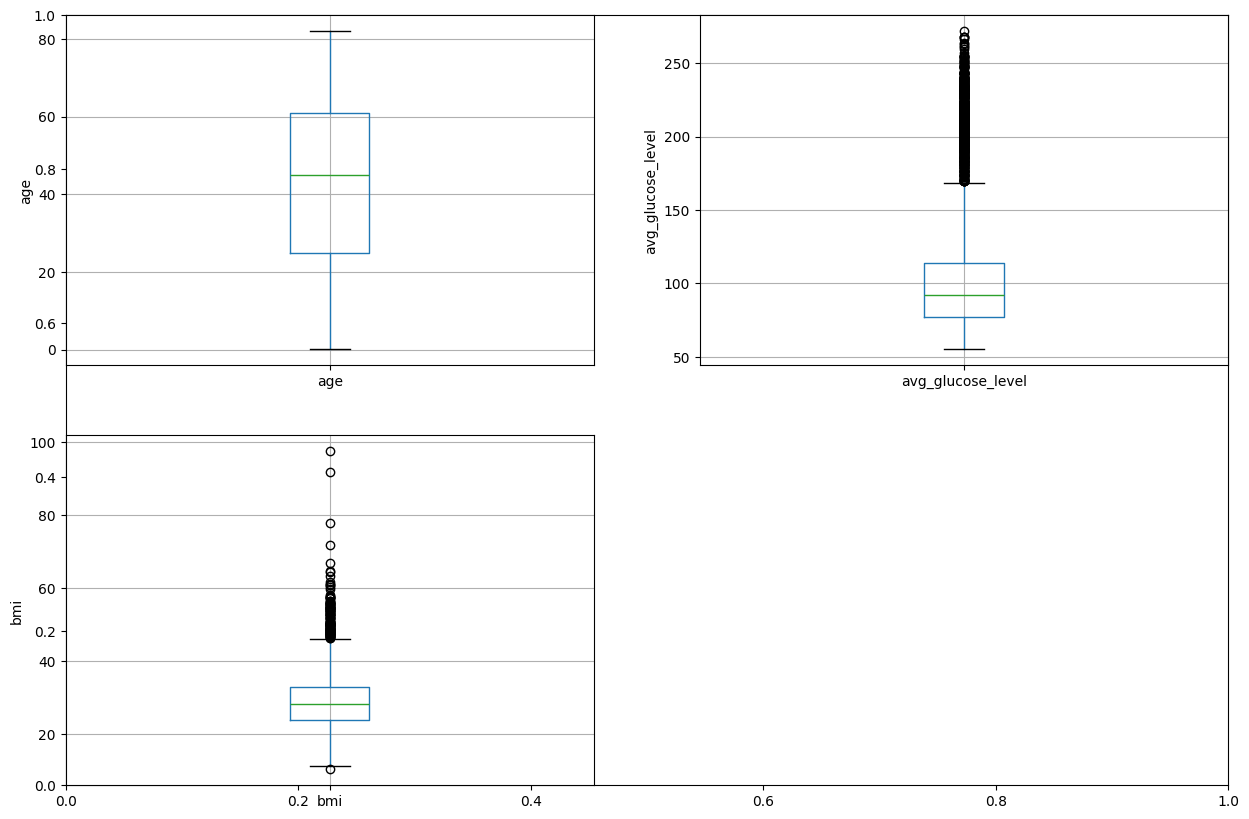

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(palette='bright')

plt.subplot(2, 2, 1)
fig = df.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('age')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='avg_glucose_level')
fig.set_title('')
fig.set_ylabel('avg_glucose_level')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='bmi')
fig.set_title('')
fig.set_ylabel('bmi')


Тепер я побудую гістограми, щоб перевірити розподіл і з'ясувати, чи є він нормальним або асиметричним. Якщо змінна має нормальний розподіл, то я проведу «Аналіз екстремальних значень», якщо ж розподіл асиметричний, то знайду IQR (міжквартильний розмах).

Text(0, 0.5, 'stroke')

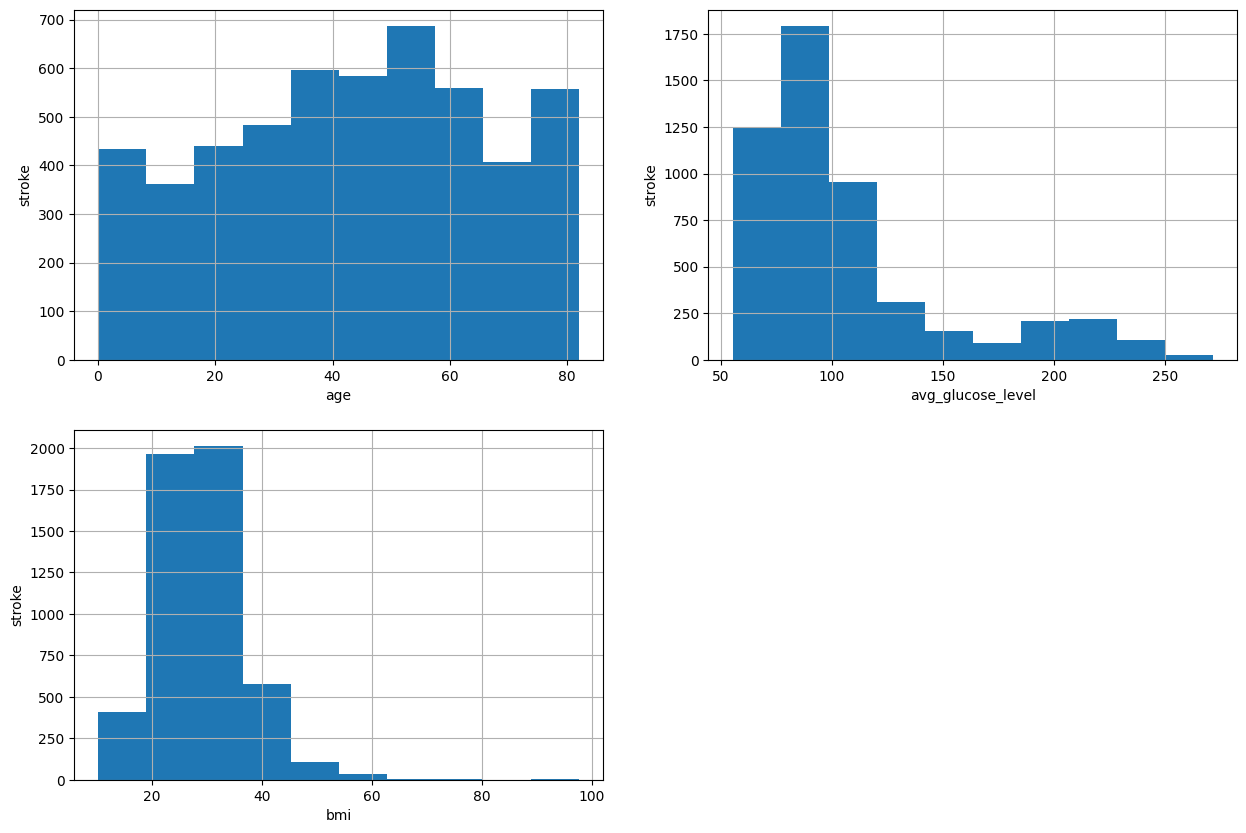

In [21]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
fig = df.age.hist(bins=10)
fig.set_xlabel('age')
fig.set_ylabel('stroke')

plt.subplot(2, 2, 2)
fig = df.avg_glucose_level.hist(bins=10)
fig.set_xlabel('avg_glucose_level')
fig.set_ylabel('stroke')


plt.subplot(2, 2, 3)
fig = df.bmi.hist(bins=10)
fig.set_xlabel('bmi')
fig.set_ylabel('stroke')

Ми бачимо, що змінні є асиметричними. Тому я використаю інтерквартильний розмах, щоб знайти викиди.

In [22]:
age_IQR = df.age.quantile(0.75) - df.age.quantile(0.25)
age_lower_fence = df.age.quantile(0.25) - (age_IQR * 1.5)
age_upper_fence = df.age.quantile(0.75) + (age_IQR * 1.5)
print('age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=age_lower_fence, upperboundary=age_upper_fence))

glucose_IQR = df.avg_glucose_level.quantile(0.75) - df.avg_glucose_level.quantile(0.25)
glucose_lower_fence = df.avg_glucose_level.quantile(0.25) - (glucose_IQR * 1.5)
glucose_upper_fence = df.avg_glucose_level.quantile(0.75) + (glucose_IQR * 1.5)

print('avg_glucose_level outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=glucose_lower_fence, upperboundary=glucose_upper_fence))

bmi_IQR = df.bmi.quantile(0.75) - df.bmi.quantile(0.25)
bmi_lower_fence = df.bmi.quantile(0.25) - (bmi_IQR * 1.5)
bmi_upper_fence = df.bmi.quantile(0.75) + (bmi_IQR * 1.5)
print('bmi outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=bmi_lower_fence, upperboundary=bmi_upper_fence))

age outliers are values < -29.0 or > 115.0
avg_glucose_level outliers are values < 21.964999999999982 or > 169.365
bmi outliers are values < 10.300000000000006 or > 46.29999999999999


Обрізаємо викиди

In [23]:
df.loc[df['age'] > age_upper_fence, 'age'] = age_upper_fence
df.loc[df['age'] < age_lower_fence, 'age'] = age_lower_fence

df.loc[df['avg_glucose_level'] > glucose_upper_fence, 'avg_glucose_level'] = glucose_upper_fence
df.loc[df['avg_glucose_level'] < glucose_lower_fence, 'avg_glucose_level'] = glucose_lower_fence

df.loc[df['bmi'] > bmi_upper_fence, 'bmi'] = bmi_upper_fence
df.loc[df['bmi'] < bmi_lower_fence, 'bmi'] = bmi_lower_fence

In [24]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,100.988838,28.691642,0.048738
std,21162.008804,22.613575,0.296633,0.226084,33.214602,7.121011,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.100000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,169.365000,46.300000,1.000000


In [25]:
stroke_counts = df['stroke'].value_counts()

print(stroke_counts)

stroke
0    4860
1     249
Name: count, dtype: int64


<ipython-input-26-76c22d9d3e15>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='viridis')


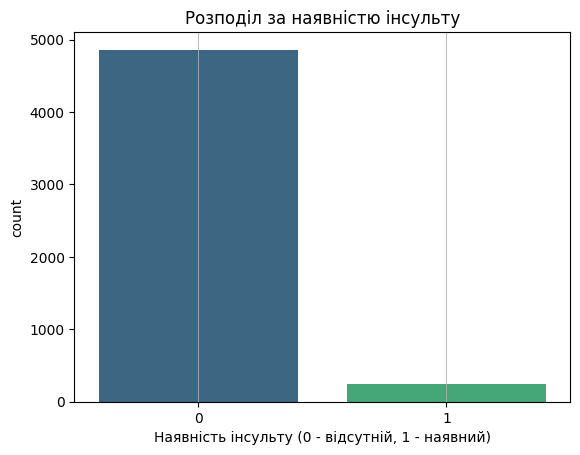

In [26]:
sns.countplot(x='stroke', data=df, palette='viridis')
plt.title('Розподіл за наявністю інсульту')
plt.xlabel('Наявність інсульту (0 - відсутній, 1 - наявний)')
plt.ylabel('count')
plt.grid(axis="x", linewidth = 0.6)
plt.show()

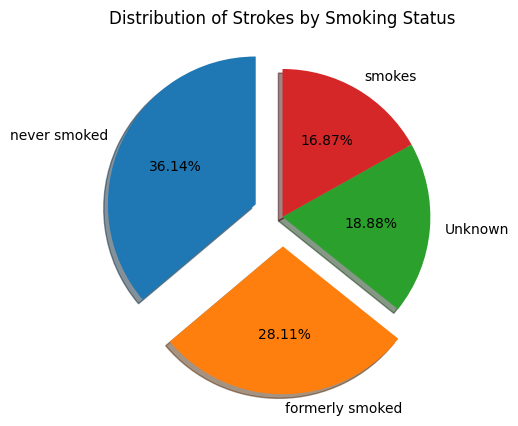

In [27]:
explode = (0.2, 0.2, 0, 0)
df.groupby('smoking_status')['stroke'].sum().nlargest(5).plot(kind='pie', autopct='%1.2f%%',  startangle=90,  title='Distribution of Strokes by Smoking Status'
                                                         ,explode=explode, shadow=True, ylabel='');

In [28]:
grouped_data = df.groupby('gender')['stroke'].count()

print(grouped_data)

gender
Female    2994
Male      2115
Name: stroke, dtype: int64


In [29]:
grouped_data = df.groupby(['gender', 'stroke']).size()
print(grouped_data)

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
dtype: int64


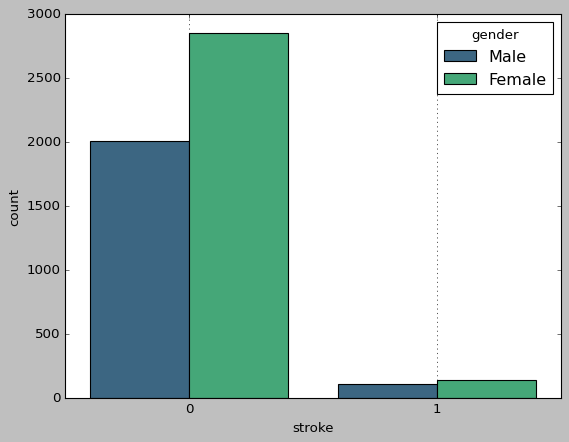

In [30]:
plt.style.use("classic")
sns.countplot(data=df, x="stroke", hue='gender', palette='viridis')
plt.title('')
plt.grid(axis="x", linewidth = 0.6)
plt.show()

In [31]:
df[categorical].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


[get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

Метод pd.get_dummies() створює dummy-колонки для кожного категоричного значення. Це означає, що він перетворює кожну категорію на окрему бінарну колонку.

In [32]:
df = pd.get_dummies(df, columns=['ever_married', 'gender', 'work_type', 'Residence_type', 'smoking_status'])

df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,gender_Female,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,169.365,36.6,1,False,True,False,...,False,True,False,False,False,True,False,True,False,False
1,51676,61.0,0,0,169.365,28.1,1,False,True,True,...,False,False,True,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.920,32.5,1,False,True,False,...,False,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,169.365,34.4,1,False,True,True,...,False,True,False,False,False,True,False,False,False,True
4,1665,79.0,1,0,169.365,24.0,1,False,True,True,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.750,28.1,0,False,True,True,...,False,True,False,False,False,True,False,False,True,False
5106,44873,81.0,0,0,125.200,40.0,0,False,True,True,...,False,False,True,False,False,True,False,False,True,False
5107,19723,35.0,0,0,82.990,30.6,0,False,True,True,...,False,False,True,False,True,False,False,False,True,False
5108,37544,51.0,0,0,166.290,25.6,0,False,True,False,...,False,True,False,False,True,False,False,True,False,False


In [33]:
 df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'ever_married_No', 'ever_married_Yes', 'gender_Female',
       'gender_Male', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5109 non-null   int64  
 1   age                             5109 non-null   float64
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   avg_glucose_level               5109 non-null   float64
 5   bmi                             5109 non-null   float64
 6   stroke                          5109 non-null   int64  
 7   ever_married_No                 5109 non-null   bool   
 8   ever_married_Yes                5109 non-null   bool   
 9   gender_Female                   5109 non-null   bool   
 10  gender_Male                     5109 non-null   bool   
 11  work_type_Govt_job              5109 non-null   bool   
 12  work_type_Never_worked          5109 no

In [35]:
correlation_matrix = df.drop(columns='id').corr()
correlation_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,gender_Female,gender_Male,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.276367,0.263777,0.199962,0.351012,0.245239,-0.679084,0.679084,0.027752,-0.027752,...,-0.078667,0.116678,0.327949,-0.634320,-0.014031,0.014031,-0.378366,0.237347,0.119207,0.073075
hypertension,0.276367,1.000000,0.108292,0.156926,0.154476,0.127891,-0.164187,0.164187,-0.021223,0.021223,...,-0.021612,-0.005358,0.115417,-0.129535,0.007980,-0.007980,-0.141551,0.059022,0.065018,0.031213
heart_disease,0.263777,0.108292,1.000000,0.139873,0.044616,0.134905,-0.114601,0.114601,-0.085685,0.085685,...,-0.015715,0.000068,0.086742,-0.091654,-0.003045,0.003045,-0.066765,0.066938,-0.021893,0.044030
avg_glucose_level,0.199962,0.156926,0.139873,1.000000,0.151792,0.115731,-0.133705,0.133705,-0.054075,0.054075,...,-0.009794,0.013889,0.052580,-0.084167,0.005808,-0.005808,-0.077633,0.052673,0.022177,0.013883
bmi,0.351012,0.154476,0.044616,0.151792,1.000000,0.042664,-0.356635,0.356635,0.024441,-0.024441,...,-0.029058,0.211181,0.078263,-0.468643,-0.004030,0.004030,-0.284276,0.114718,0.112283,0.091125
stroke,0.245239,0.127891,0.134905,0.115731,0.042664,1.000000,-0.108299,0.108299,-0.009081,0.009081,...,-0.014885,0.011927,0.062150,-0.083888,-0.015415,0.015415,-0.055924,0.064683,-0.004163,0.008920
ever_married_No,-0.679084,-0.164187,-0.114601,-0.133705,-0.356635,-0.108299,1.000000,-1.000000,-0.030171,0.030171,...,0.090873,-0.154104,-0.192637,0.544658,0.005988,-0.005988,0.332335,-0.171960,-0.102663,-0.105132
ever_married_Yes,0.679084,0.164187,0.114601,0.133705,0.356635,0.108299,-1.000000,1.000000,0.030171,-0.030171,...,-0.090873,0.154104,0.192637,-0.544658,-0.005988,0.005988,-0.332335,0.171960,0.102663,0.105132
gender_Female,0.027752,-0.021223,-0.085685,-0.054075,0.024441,-0.009081,-0.030171,0.030171,1.000000,-1.000000,...,-0.011486,0.032502,0.026045,-0.089226,-0.006105,0.006105,-0.059557,-0.043121,0.098952,-0.011408
gender_Male,-0.027752,0.021223,0.085685,0.054075,-0.024441,0.009081,0.030171,-0.030171,-1.000000,1.000000,...,0.011486,-0.032502,-0.026045,0.089226,0.006105,-0.006105,0.059557,0.043121,-0.098952,0.011408


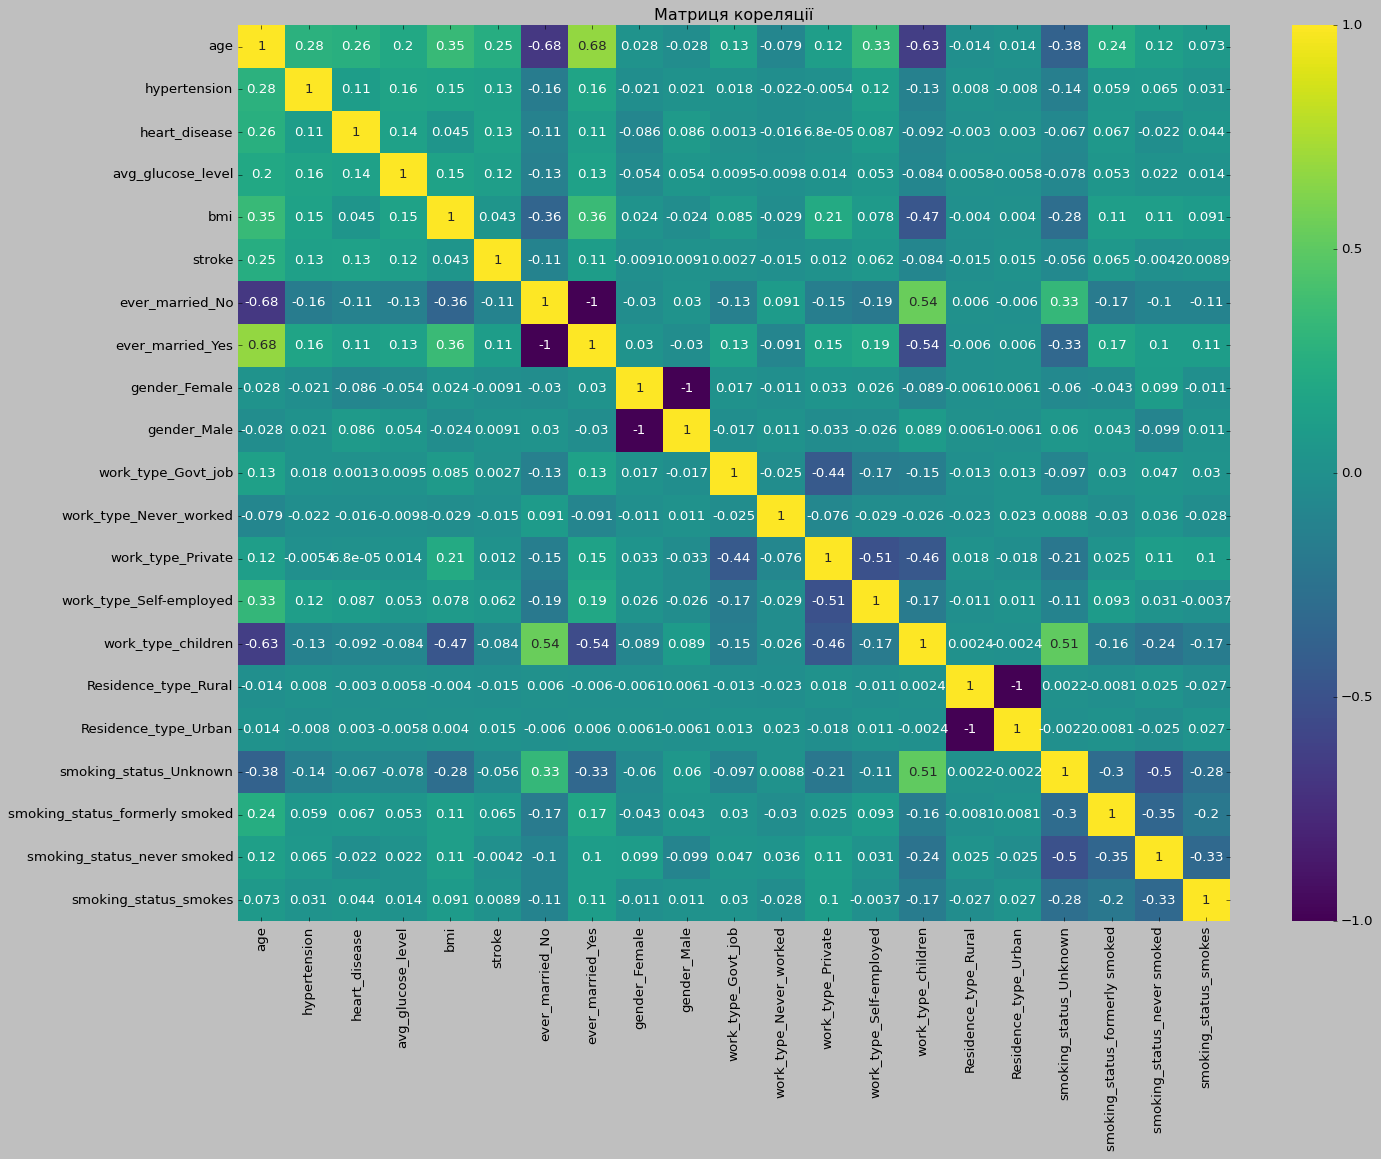

In [36]:
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Матриця кореляції")
plt.show()

In [37]:
correlation_with_stroke = correlation_matrix['stroke'].sort_values(ascending=False)

correlation_with_stroke

,stroke
stroke,1.000000
age,0.245239
heart_disease,0.134905
hypertension,0.127891
avg_glucose_level,0.115731
ever_married_Yes,0.108299
smoking_status_formerly smoked,0.064683
work_type_Self-employed,0.062150
bmi,0.042664
Residence_type_Urban,0.015415


# ***Результати кореляції:***

❌ ***Позитивний зв'язок з ризиком інсульту***:

***age***: 0.245239 - старші люди мають більший ризик;

***heart_disease***: 0.134905 - люди з серцевими захворюваннями мають більший ризик інсульту;

***hypertension***: 0.127891 - люди з гіпертонією мають більший ризик інсульту;

***avg_glucose_level***: 0.115731 - вищий рівень глюкози асоціюється з більшим ризиком інсульту;

***ever_married_Yes***: 0.108299 - одружені люди мають трохи більший ризик інсульту;

***smoking_status_formerly smoked***: 0.064683 - колишні курці мають більший ризик інсульту;

***work_type_Self-employed***: 0.062150 -  самозайняті особи мають більший ризик інсульту;

***bmi***: 0.042664 - вищий індекс маси тіла асоціюється з більшим ризиком інсульту;



---



❗***Позитивний, але дуже слабкий зв'язок***:

***Residence_type_Urban***: 0.015415 -  міське місце проживання;

***work_type_Private***: 0.011927 - робота у приватному секторі;

***gender_Male***: 0.009081 - чоловіча стать;

***smoking_status_smokes***: 0.008920 - курці;

***work_type_Govt_job***: 0.002660 - робота на державній службі;



---

❎ ***Негативний, але дуже слабкий зв'язок***:

***smoking_status_never smoked***: -0.004163 - люди, які ніколи не курили;

***gender_Female***: -0.009081 - жіноча стать;

***work_type_Never_worked***: -0.014885 - які ніколи не працювали;

***Residence_type_Rural***: -0.015415 - сільське місце проживання;


---

✅ ***Негативний зв'язок***:

***smoking_status_Unknown***: -0.055924 - люди з невідомим статусом куріння;

***work_type_children***: -0.083888 - діти мають менший ризик інсульту;

***ever_married_No***: -0.108299 - неодружені люди мають менший ризик інсульту.

<ipython-input-38-11494f84c897>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


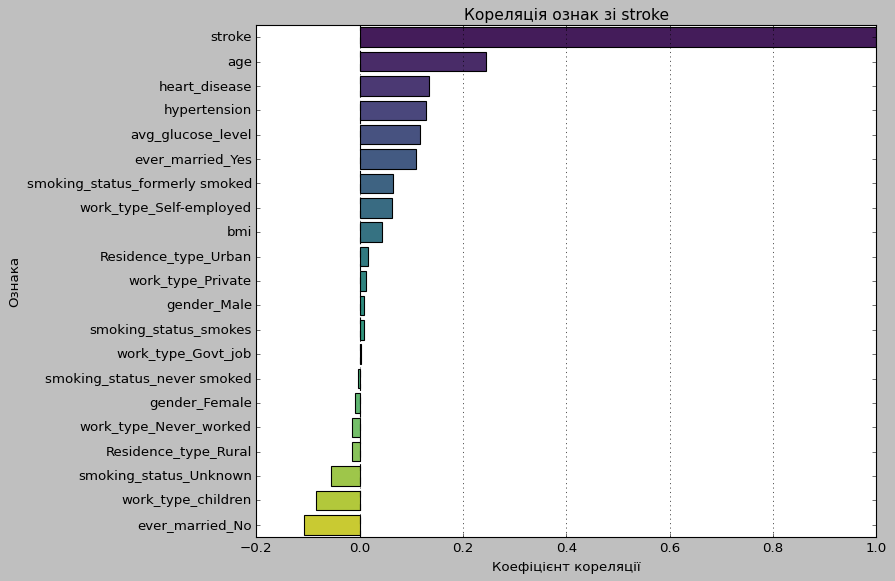

In [38]:
plt.figure(figsize=(10, 8))
sns.barplot(
    x=correlation_with_stroke.values,
    y=correlation_with_stroke.index,
    palette="viridis"
)

plt.title("Кореляція ознак зі stroke", fontsize=14)
plt.xlabel("Коефіцієнт кореляції", fontsize=12)
plt.ylabel("Ознака", fontsize=12)
plt.axvline(0, color="black", linestyle="--")
plt.grid(axis="x", linewidth = 0.6)
plt.show()

In [39]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,gender_Female,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,169.365,36.6,1,False,True,False,...,False,True,False,False,False,True,False,True,False,False
1,51676,61.0,0,0,169.365,28.1,1,False,True,True,...,False,False,True,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.920,32.5,1,False,True,False,...,False,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,169.365,34.4,1,False,True,True,...,False,True,False,False,False,True,False,False,False,True
4,1665,79.0,1,0,169.365,24.0,1,False,True,True,...,False,False,True,False,True,False,False,False,True,False


# ***Model Training¶***

In [40]:
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

print(X.shape)
print(y.shape)

(5109, 20)
(5109,)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4087, 20) (1022, 20)
(4087,) (1022,)


In [42]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [43]:
# def model_metrics(y_test, y_pred, model, name):

#     conf_matrix = confusion_matrix(y_test, y_pred)
#     fig, ax = plt.subplots(figsize=(6, 5))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=model.classes_, yticklabels=model.classes_)
#     plt.title(f'Confusion Matrix for {name} Classifier')
#     plt.xlabel("Predicted Labels")
#     plt.ylabel("True Labels")
#     plt.show()


++++++++++++++++++++++++++++++
Decision Tree
++++++++++++++++++++++++++++++
Accuracy on Train set: 1.0000
Accuracy on Test set: 0.9129
CV mean Accuracy: 0.9060


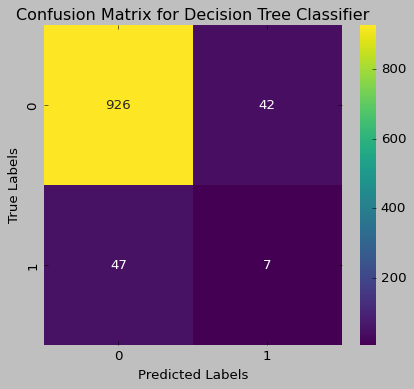

predict_proba для класу 0: [1. 1. 1. ... 0. 1. 1.]
predict_proba для класу 1: [0. 0. 0. ... 1. 0. 0.]
Training set score: 1.0000
Test set score: 0.9129
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       968
           1       0.14      0.13      0.14        54

    accuracy                           0.91      1022
   macro avg       0.55      0.54      0.55      1022
weighted avg       0.91      0.91      0.91      1022


++++++++++++++++++++++++++++++
Random Forest
++++++++++++++++++++++++++++++
Accuracy on Train set: 1.0000
Accuracy on Test set: 0.9481
CV mean Accuracy: 0.9503


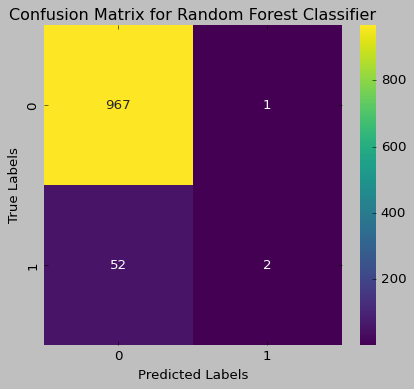

predict_proba для класу 0: [0.6  1.   0.99 ... 0.82 1.   1.  ]
predict_proba для класу 1: [0.4  0.   0.01 ... 0.18 0.   0.  ]
Training set score: 1.0000
Test set score: 0.9481
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.67      0.04      0.07        54

    accuracy                           0.95      1022
   macro avg       0.81      0.52      0.52      1022
weighted avg       0.93      0.95      0.93      1022


++++++++++++++++++++++++++++++
Gradient Boosting
++++++++++++++++++++++++++++++
Accuracy on Train set: 0.9577
Accuracy on Test set: 0.9472
CV mean Accuracy: 0.9494


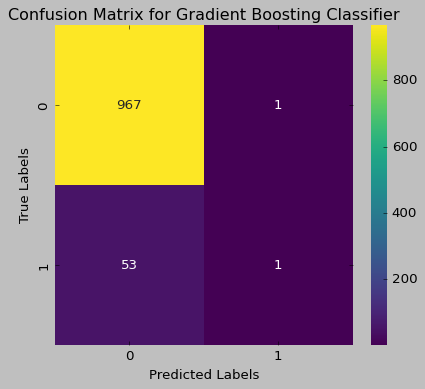

predict_proba для класу 0: [0.75091046 0.99801985 0.98583755 ... 0.48957776 0.99632603 0.99668994]
predict_proba для класу 1: [0.24908954 0.00198015 0.01416245 ... 0.51042224 0.00367397 0.00331006]
Training set score: 0.9577
Test set score: 0.9472
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.50      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.92      0.95      0.92      1022


++++++++++++++++++++++++++++++
Logistic Regression
++++++++++++++++++++++++++++++
Accuracy on Train set: 0.9523
Accuracy on Test set: 0.9472
CV mean Accuracy: 0.9523


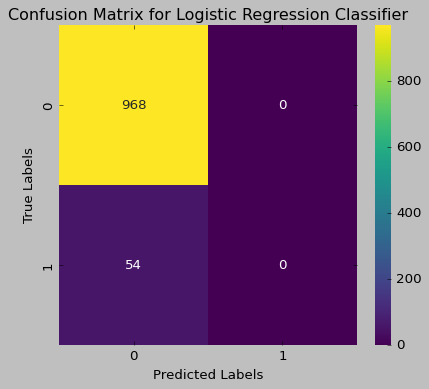

predict_proba для класу 0: [0.62583256 0.99917228 0.97065794 ... 0.75894622 0.98768549 0.99935497]
predict_proba для класу 1: [0.37416744 0.00082772 0.02934206 ... 0.24105378 0.01231451 0.00064503]
Training set score: 0.9523
Test set score: 0.9472
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022


++++++++++++++++++++++++++++++
KNeighborsClassifier
++++++++++++++++++++++++++++++
Accuracy on Train set: 0.9574
Accuracy on Test set: 0.9403
CV mean Accuracy: 0.9471


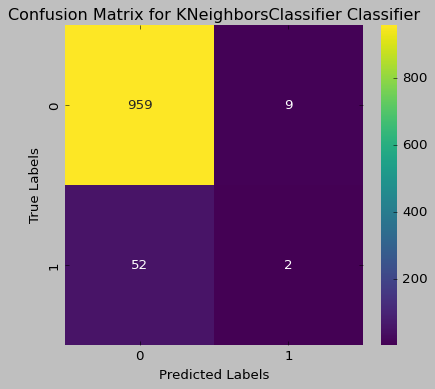

predict_proba для класу 0: [0.33333333 1.         1.         ... 0.66666667 1.         1.        ]
predict_proba для класу 1: [0.66666667 0.         0.         ... 0.33333333 0.         0.        ]
Training set score: 0.9574
Test set score: 0.9403
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       968
           1       0.18      0.04      0.06        54

    accuracy                           0.94      1022
   macro avg       0.57      0.51      0.52      1022
weighted avg       0.91      0.94      0.92      1022



<Figure size 640x480 with 0 Axes>

In [44]:
# Ініціалізація KFold
kf = KFold(shuffle=True, n_splits=5)

# Функція для відображення метрик моделі
def model_metrics(y_test, y_pred, model, name):
    conf_matrix = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {name} Classifier')
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Словник моделей для циклу
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3)
}

# Цикл для навчання та оцінки моделей
for name, model in models.items():
    print(f"\n{'+'*30}\n{name}\n{'+'*30}")

    # Навчання моделі
    model.fit(X_train, y_train)

    # Прогноз на навчальному та тестовому наборі
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Вивід точності моделі
    print(f'Accuracy on Train set: {accuracy_score(y_train, y_pred_train):0.4f}')
    print(f'Accuracy on Test set: {accuracy_score(y_test, y_pred_test):0.4f}')

    # Крос-валідація
    n_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    print(f'CV mean Accuracy: {n_scores.mean():0.4f}')

    # Відображення метрик моделі
    model_metrics(y_test, y_pred=y_pred_test, model=model, name=name)

    # Вивід ймовірностей
    if hasattr(model, "predict_proba"):
        print(f'predict_proba для класу 0: {model.predict_proba(X_test)[:,0]}')
        print(f'predict_proba для класу 1: {model.predict_proba(X_test)[:,1]}')

    # Перевірка переобучення та недообучення
    print(f'Training set score: {model.score(X_train, y_train):.4f}')
    print(f'Test set score: {model.score(X_test, y_test):.4f}')

    # Вивід classification report
    print(classification_report(y_test, y_pred_test, zero_division=0))

plt.tight_layout()
plt.show()


# ***Decision Tree¶***

In [45]:
# dt_model = DecisionTreeClassifier()
# dt_model.fit(X_train, y_train)
# y_pred_dt_train = dt_model.predict(X_train)
# y_pred_dt_test = dt_model.predict(X_test)

# #Accuracy = (TP+TN)/(TP+TN+FP+FN)

# print('Decision Tree Accuracy on Train set: {0:0.4f}'.format(accuracy_score(y_train, y_pred_dt_train)))
# print('Decision Tree Accuracy on Test set: {0:0.4f}'.format(accuracy_score(y_test, y_pred_dt_test)))

# n_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=kf, scoring='accuracy')
# print(f'CV mean Accuracy Decision Tree: {n_scores_dt.mean()}')

# model_metrics(y_test, y_pred=y_pred_dt_test, model=dt_model, name='Decision Tree')

In [46]:
# # predict_proba дає ймовірності отримати висновок 0
# print(dt_model.predict_proba(X_test)[:,0])
# # predict_proba дає ймовірності отримати висновок 1
# print(dt_model.predict_proba(X_test)[:,1])

# # перевірити overfitting and underfitting
# print('Training set score: {:.4f}'.format(dt_model.score(X_train, y_train)))
# print('Test set score: {:.4f}'.format(dt_model.score(X_test, y_test)))

# print(classification_report(y_test, y_pred_dt_test))

# ***Random Forest¶***

In [47]:
# rf_model = RandomForestClassifier()
# rf_model.fit(X_train, y_train)
# y_pred_rf_train = rf_model.predict(X_train)
# y_pred_rf_test =rf_model.predict(X_test)

# print('Random Forest Accuracy on Train set: {0:0.4f}'.format(accuracy_score(y_train, y_pred_rf_train)))
# print('Random Forest Accuracy on Test set: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf_test)))

# n_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')
# print(f'CV mean Accuracy Random Forest: {n_scores_rf.mean()}')

# model_metrics(y_test, y_pred=y_pred_rf_test, model=rf_model, name='Random Forest¶')

In [48]:
# # predict_proba дає ймовірності отримати висновок 0
# print(rf_model.predict_proba(X_test)[:,0])
# # predict_proba дає ймовірності отримати висновок 1
# print(rf_model.predict_proba(X_test)[:,1])

# # перевірити overfitting and underfitting
# print('Training set score: {:.4f}'.format(rf_model.score(X_train, y_train)))
# print('Test set score: {:.4f}'.format(rf_model.score(X_test, y_test)))

# print(classification_report(y_test, y_pred_rf_test))

# ***GradientBoostingClassifier***

In [49]:
# gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
# gb_model.fit(X_train, y_train)
# y_pred_gb_train = gb_model.predict(X_train)
# y_pred_gb_test = gb_model.predict(X_test)
# print('GradientBoostingClassifier Accuracy on Train set: {0:0.4f}'.format(accuracy_score(y_train, y_pred_gb_train)))
# print('GradientBoostingClassifier Accuracy on Test set: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gb_test)))

# n_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=kf, scoring='accuracy')
# print(f'CV mean Accuracy GradientBoostingClassifier: {n_scores_gb.mean()}')

# model_metrics(y_test, y_pred=y_pred_gb_test, model=rf_model, name='GradientBoostingClassifier')

In [50]:
# # predict_proba дає ймовірності отримати висновок 0
# print(gb_model.predict_proba(X_test)[:,0])
# # predict_proba дає ймовірності отримати висновок 1
# print(gb_model.predict_proba(X_test)[:,1])

# # перевірити overfitting and underfitting
# print('Training set score: {:.4f}'.format(gb_model.score(X_train, y_train)))
# print('Test set score: {:.4f}'.format(rf_model.score(X_test, y_test)))

# print(classification_report(y_test, y_pred_gb_test))

# ***LogisticRegression***

In [51]:
# log_model =  LogisticRegression(max_iter=10000, random_state=42)
# log_model.fit(X_train, y_train)

# y_pred_log_train = log_model.predict(X_train)
# y_pred_log_test = log_model.predict(X_test)
# print('LogisticRegression Accuracy on Train set: {0:0.4f}'.format(accuracy_score(y_train, y_pred_log_train)))
# print('LogisticRegression Accuracy on Test set: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log_test)))

# n_scores_log = cross_val_score(log_model, X_train, y_train,cv=kf, scoring='accuracy')
# print(f'CV mean Accuracy LogisticRegression: {n_scores_log.mean()}')

# model_metrics(y_test, y_pred=y_pred_log_test, model=log_model, name='LogisticRegression')

In [52]:
# # predict_proba дає ймовірності отримати висновок 0
# print(log_model.predict_proba(X_test)[:,0])
# # predict_proba дає ймовірності отримати висновок 1
# print(log_model.predict_proba(X_test)[:,1])

# # перевірити overfitting and underfitting
# print('Training set score: {:.4f}'.format(log_model.score(X_train, y_train)))
# print('Test set score: {:.4f}'.format(log_model.score(X_test, y_test)))

# print(classification_report(y_test, y_pred_log_test))

# ***KNeighborsClassifier***

In [53]:
# knn_model =  KNeighborsClassifier(n_neighbors=3)
# knn_model.fit(X_train, y_train)

# y_pred_knn_train = knn_model.predict(X_train)
# y_pred_knn_test = knn_model.predict(X_test)

# print('KNeighborsClassifier Accuracy on Train set: {0:0.4f}'.format(accuracy_score(y_train, y_pred_knn_train)))
# print('KNeighborsClassifier Accuracy on Test set: {0:0.4f}'.format(accuracy_score(y_test, y_pred_knn_test)))

# n_scores_knn = cross_val_score(knn_model, X_train, y_train, cv=kf, scoring='accuracy')
# print(f'CV mean Accuracy KNeighborsClassifier : {n_scores_knn.mean()}')

# model_metrics(y_test, y_pred=y_pred_knn_test, model=knn_model, name='KNeighborsClassifier')

In [54]:
# # predict_proba дає ймовірності отримати висновок 0
# print(knn_model.predict_proba(X_test)[:,0])
# # predict_proba дає ймовірності отримати висновок 1
# print(knn_model.predict_proba(X_test)[:,1])

# # перевірити overfitting and underfitting
# print('Training set score: {:.4f}'.format(knn_model.score(X_train, y_train)))
# print('Test set score: {:.4f}'.format(knn_model.score(X_test, y_test)))

# print(classification_report(y_test, y_pred_knn_test))